In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Boosting Methods in Machine Learning

/content/drive/MyDrive/Course Material/Supervised Machine Learning/Boosting Methods in Machine Learning


# Importing Data

In [7]:
train = pd.read_csv('titanic_train.csv')
train.shape

(891, 12)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarked implies where the traveler mounted from. There are three possible values for Embark
### Southampton, Cherbourg, and Queenstown.

### SibSp is the number of siblings or spouse of a person onboard

###  Parch is the feature contained the number of parents or children each passenger was touring with.

# Dropping Irrelevant Features

In [9]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)

# Checking For Null Values

In [10]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Replacing Null Values in "Age" with mean value of "Age"

In [11]:
train.fillna(value = { "Age" : train['Age'].mean()}, inplace = True)

In [12]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Drop all the rows containing Null Values

In [13]:
train.dropna(inplace=True)

In [14]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Creating Dummy Variables and dropping first column to avoid multicollinearity

In [16]:
Sex = pd.get_dummies(train['Sex'],drop_first = True)
Embark = pd.get_dummies(train['Embarked'],drop_first = True)

# Adding dummy variables to original data

In [17]:
train = pd.concat([train, Sex, Embark], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


# Removing Sex and Embarked because their dummy variables are created

In [18]:
train.drop(['Sex', 'Embarked'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extracting features and labels

In [19]:
X = train.drop(['Survived'], axis = 1)

In [20]:
y = train['Survived']

# Performing a train test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
X_test.shape

(178, 8)

# Estimating Number of Estimators

In [23]:
error_rates = []

for i in range(1,20):

    model = AdaBoostClassifier(n_estimators = i)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

# Plotting Error_Rate Vs Number of Estimators

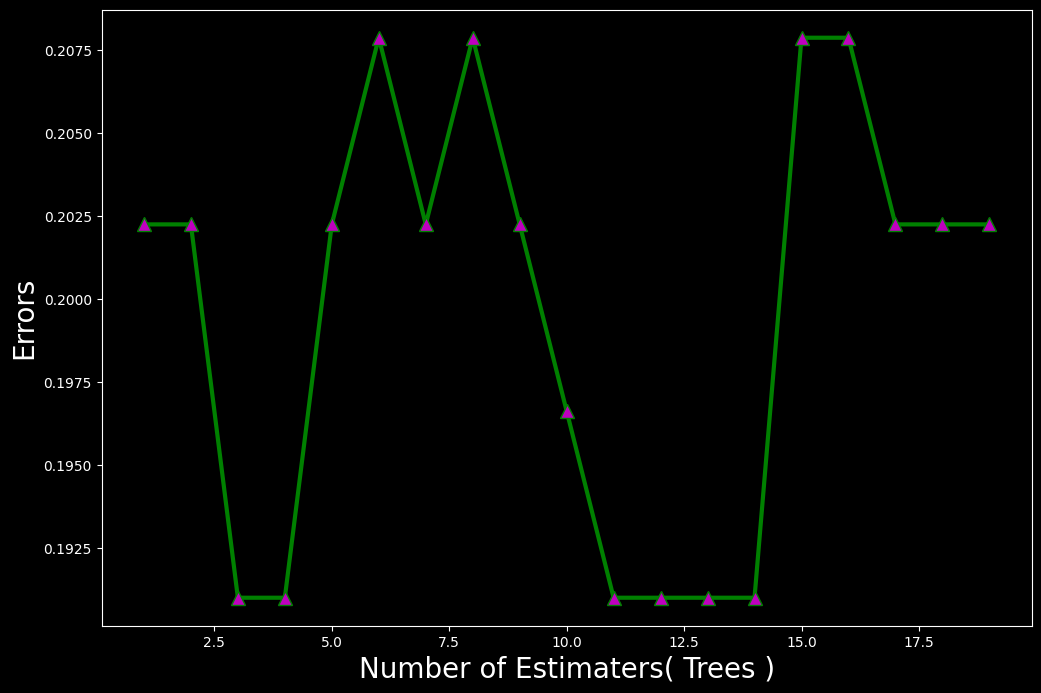

In [24]:
plt.figure(figsize = (12,8))
plt.plot(range(1,20),error_rates, 'g', lw = 3, marker ="^", markersize = 10, markerfacecolor = "m")
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()


# Instantiating Adaboost Classifier with Optimal number of estimators

In [25]:
model = AdaBoostClassifier(n_estimators = 3)

In [26]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3)

In [27]:
y_pred= model.predict(X_test)

In [28]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 80.90


# Confusion Matrix

In [29]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

# Confusion Matrix, Precision, Recall and F1-Score

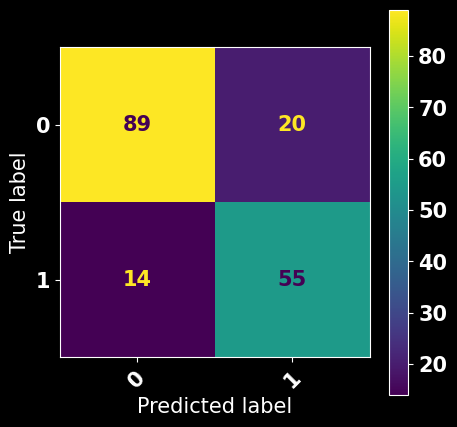

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

In [31]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [32]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.808989,0.798706,0.806808,0.801756
